<a href="https://colab.research.google.com/github/GubioGL/Aprendendo_pytorch/blob/main/pytorch_leaning_01_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch as tc
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
tc.__version__

'2.1.0+cu121'

# Fundamentos do workflow do pytorch

Em todo modelo/aplicação de aprendizado de máquina, temos algum tipo de dado e o algoritmo(Exemplo as redes neurais).

Para o treinamento do algorimto dentro do pytorch, existe alguns passos(Ver figura a seguir).

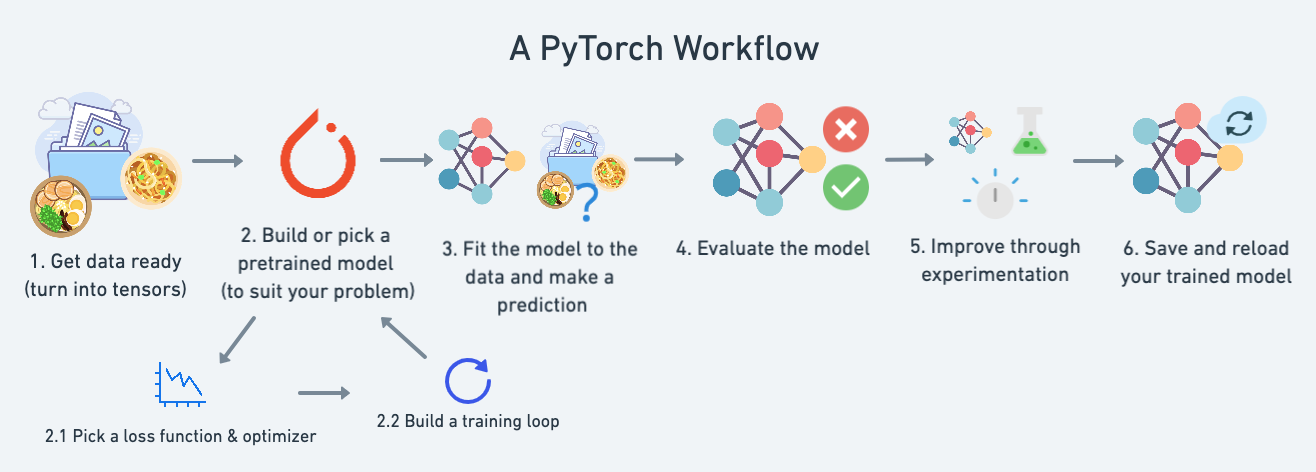



1° Dados:

Indenpende da sua aplicação ou problema, necessitamos pegar o dados em converte na variável do tipo "torch.tensor()".

2° Algoritmo:

Nessa etapa você ira definiar seu modelo. No caso da rede neural podemos defirnir qual tipo de rede iremos usar, quais são os hiperparametros como quantidade de camada, neuronio por camada, função de ativaçãoo, algoritmo de otimização, função custo .....

3° Treino :

4° Predição:

5° Salvar o modelo/resultados

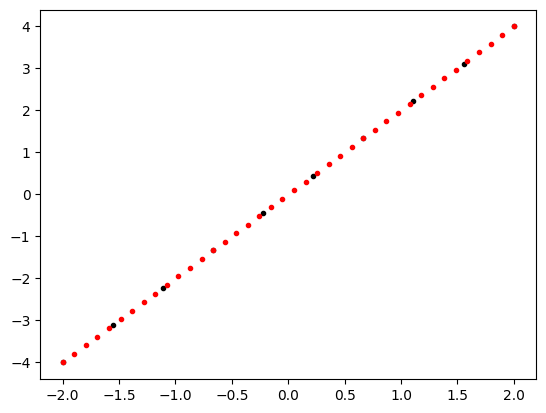

In [5]:
# Exemplo

def fun(a,x_):
    return a*x_    #$tc.exp(-a*x_**2)

# Criando os dados de treino
x_train = tc.linspace(-2,2,10).reshape(10,1)
y_train = fun(2,x_train)


# Criando os dados de teste
x_test = tc.linspace(-2,2,40).reshape(40,1)
y_test = fun(2,x_test)


# Visualizando os dados de treino

plt.plot(x_train,y_train,"k." )
plt.plot(x_test,y_test,"r.",label="test" )
plt.show()

Obs: Como aqui estamos criando os dados, não iremos nos preocupar com separar os dados de treino, teste e validação.

In [6]:
x_train,y_train,

(tensor([[-2.0000],
         [-1.5556],
         [-1.1111],
         [-0.6667],
         [-0.2222],
         [ 0.2222],
         [ 0.6667],
         [ 1.1111],
         [ 1.5556],
         [ 2.0000]]),
 tensor([[-4.0000],
         [-3.1111],
         [-2.2222],
         [-1.3333],
         [-0.4444],
         [ 0.4444],
         [ 1.3333],
         [ 2.2222],
         [ 3.1111],
         [ 4.0000]]))

1° Primeira parte concluída.

In [7]:
# Construindo o modelo

class Regressao(nn.Module):
    def __init__(self):
        super().__init__()
        self.peso = nn.Parameter(tc.randn(1,requires_grad=True))
        self.bias = nn.Parameter(tc.randn(1,requires_grad=True))

    def forward(self, x: tc.Tensor) -> tc.Tensor:
        return self.peso*x + self.bias # <- Essa é um regressão linear (y = m*x + b)

Podemos fazer um check, para verificar se nossa classe foi criado corretamente.

Para tanto criaremos um instâcia da classe e pedir algumas informações dela.

In [19]:
tc.manual_seed(42) # definindo a semente do gerador aleatorio

model = Regressao()

list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

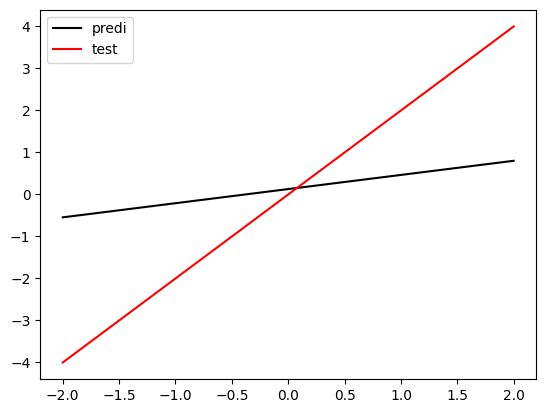

In [20]:
# predição com  torch.inference_mode()
with tc.inference_mode():
    y_preds = model(x_test)

plt.plot(x_test,y_preds,"k-",label="predi"  )
plt.plot(x_test,y_test,"r-",label="test" )
plt.legend()
plt.show()

In [13]:
# Podemos calcular o quanto a predição foi ruim
tc.sum(abs(y_preds-y_test))/len(y_test)

tensor(1.7081)

Note que o resultado foi ruim por que estamos fazendo um predição com valores aleatorio. Nessecitamos realizar um treinamento.

3° Treinamento:

In [21]:
# Criaremos um função custo
loss_f = nn.L1Loss()  # Erro absoluto medio

# Adicionando um algoritmo de otimização para melhorar os parametro da rede
# fazendo a rede neural aprender com os dados.
# lr== é a taxa de aprendizado
optimizer = tc.optim.Adam(params=model.parameters(),lr=0.01) #

Para iniciar o treino precisamos saber as etapas que seram realizada, durante cada passso de treinamento.



1.   Fowward:

    O modelo passa por todos os dados de treinamento uma vez, realizando seus cálculos de model.forward()
2.   Calcular o loss:

    O resultado  do modelo são comparadas com o label(y_train)  e avaliadas para ver o quão erradas elas estão.
3.   Zero gradientes:

    Os gradientes dos otimizadores são definidos como zero (eles são acumulados por padrão) para que possam ser recalculados para a etapa de treinamento específica.
4.   Backpropagation:

    Calcula o gradiente do loss com respeito a cada parâmetro de modelo a ser atualizado. Isso é conhecido como backpropagation, portanto, "para trás".requires_grad=True
5.   update os peso e bias:

    Atualizar os parâmetros com relação aos gradientes de perda para melhorá-los.requires_grad=True



In [22]:

# Vamos criar um loop para cada etapa de treino
# O numero de etapas de treino é chamado de epochs
epochs = 1000
for epoch in range(epochs):
    ## Colocar no modo de treino
    model.train()

    # 1° Forward
    y_preds = model(x_train)
    # 2° Calcular o custo/ erro do modelo
    loss = loss_f(y_preds, y_train)
    # 3° Zerando o Gradiente
    optimizer.zero_grad()
    # 4° Backpropagation
    loss.backward()
    # 5° update
    optimizer.step()


    ## Colocar no modo de avaliação
    model.eval()

    with tc.inference_mode():
        # Forward dados de test
        y_preds_test = model(x_test)

        # Calcular o loss
        loss_test = loss_f(y_preds_test,y_test)

        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {loss_test} ")




Epoch: 0 | MAE Train Loss: 1.8481218814849854 | MAE Test Loss: 1.6976041793823242 
Epoch: 100 | MAE Train Loss: 0.7373369932174683 | MAE Test Loss: 0.6767839789390564 
Epoch: 200 | MAE Train Loss: 0.004895257763564587 | MAE Test Loss: 0.005306589417159557 
Epoch: 300 | MAE Train Loss: 0.0010298669803887606 | MAE Test Loss: 9.083673649001867e-05 
Epoch: 400 | MAE Train Loss: 0.0009481966262683272 | MAE Test Loss: 0.0015127189690247178 
Epoch: 500 | MAE Train Loss: 0.0013561189407482743 | MAE Test Loss: 0.0005064394208602607 
Epoch: 600 | MAE Train Loss: 0.0016245425213128328 | MAE Test Loss: 0.0008421543752774596 
Epoch: 700 | MAE Train Loss: 0.0006079673767089844 | MAE Test Loss: 0.0010721214348450303 
Epoch: 800 | MAE Train Loss: 0.001094347215257585 | MAE Test Loss: 0.0007919613271951675 
Epoch: 900 | MAE Train Loss: 0.0017609596252441406 | MAE Test Loss: 0.0010497577022761106 


In [31]:

print("Os Parametro do modelo antes do treinamento:")
print(model.state_dict())
print("\nOs Parametro do modelo Depois do treinamento:")
print(f"weights: {model.peso.item()}, bias: {model.bias.item()}")

Os Parametro do modelo antes do treinamento:
OrderedDict([('peso', tensor([1.9995])), ('bias', tensor([-0.0013]))])

Os Parametro do modelo Depois do treinamento:
weights: 1.9994851350784302, bias: -0.0012931532692164183


Realizando a predição e visualizando os dados

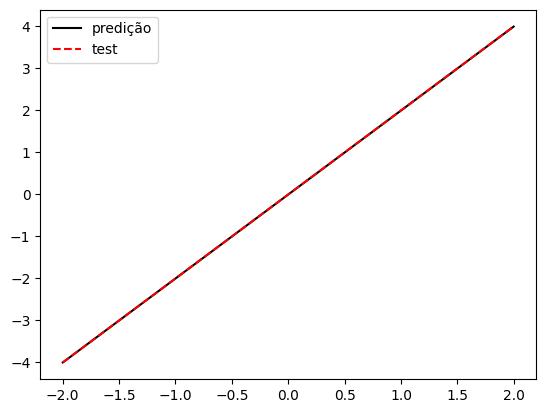

In [35]:
## Colocar no modo de avaliação
model.eval()

# 2. Confidurando para realizar a predição
with tc.inference_mode():
  y_preds = model(x_test)


plt.plot(x_test,y_preds,"k-",label="predição"  )
plt.plot(x_test,y_test,"r--",label="test" )
plt.legend()
plt.show()

# Salvando e carregando o modelo

In [40]:
# para podemos reutilizar o modelo podemos salvar os parametros e executar novamente depois
tc.save(model.state_dict(),"regression.pth")

Nota: É comum que os modelos ou objetos salvos do PyTorch terminem com ou , como ".pt" OU ".pth".

In [43]:
load_model = Regressao()
load_model.load_state_dict(
    tc.load(f='regression.pth'))

<All keys matched successfully>

In [44]:
## Colocar no modo de avaliação
load_model.eval()

with tc.inference_mode():
    loaded_model_preds = load_model(x_test)

# Comparando o resultado anterior com o carregado com o loaded model
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])